# Satellite observation : channels images (VIS, WV and IR)

The aim of this notebook is to indicate how to read the satellite data.

The satellites emit signals at different wavelengths and capture signals reflected and/or re-emitted by the clouds or by the earth surface in clear skies. A channel means a range of wavelenghts : visible, infrared... A channel for which the wavelength is between 5 and 7.5 µm is called 'water vapor' because for that wavelength range, the water vapor absorbs a large part of these radiations. It is very useful to know the water vapor content in the atmosphere. 

3 channels are represented in the data:
<ul>
    <li>'VIS06' : visible channel (0.6 µm)</li>
    <li>'IRG108' : infrared channel (10.8 µm)</li>
    <li>'WV62' : water vapor channel (6.2 µm)</li>    
</ul>

The time step is 15 minutes, the spatial resolution, 0.0425° (the projection system is EPSG:4326). Each file contains for a time step, a channel and one geograhic zone ('NW' for North-West of France or 'SE' for South-East of France). The missing values are -32 267. 

/!\The visible channel is by definition not visible at night; there are huge gaps of distribution between the day and night and a lot of missing values for this channel.

In [1]:
from meteonet_toolbox.user_configuration import DOMAINS,n_epsg,SAT_COORD
from meteonet_toolbox.utils import get_satellite_as_xarray
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import xarray as xr 

In [27]:
####Cell containing the modifiable fields######
zone = 'NW'   #geographic zone
channel = "WV62"

In [28]:
fpath = "../../data_samples/satellite/%s_%s_201601011200.npz"%(channel,zone)
title = "Channel %s - day 20160101 12H00 - zone %s "%(channel,zone)

## Quick start using  `get_satellite_as_xarray` function

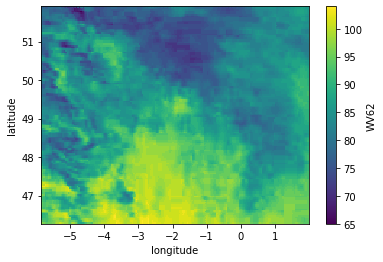

In [29]:
ds = get_satellite_as_xarray(fpath,zone,channel)
ds[channel].plot()

## Function to make a plot with Coastline using basemap 

In [30]:
#coordinates of study zone boundaries
lllat=DOMAINS[zone]['lry']    #lower left latitude
urlat=DOMAINS[zone]['uly']    #upper right latitude
lllon=DOMAINS[zone]['ulx']    #lower left longitude
urlon=DOMAINS[zone]['lrx']    #upper right longitude

In [36]:
#data loading
def plot_figure(fname, channel, title):
    d = np.load(fname, allow_pickle=True)
    d.files  #know the compressed file structure
    data = d['arr_0']
    fig, ax = plt.subplots(1, 1, figsize=(14, 16))
    #background map definition :
    try:
        from mpl_toolkits.basemap import Basemap
        m = Basemap(
            epsg=n_epsg,  # Projection type 
            resolution='i',  # resolution of coastlines
            llcrnrlat=lllat,  #  Coordinates of corners 
            urcrnrlat=urlat,
            llcrnrlon=lllon,
            urcrnrlon=urlon)
        #plot the data and the background map (coastlines and borders)
        m.drawcoastlines()
        m.drawcountries()
        img = m.imshow(data, interpolation='none', origin='upper')
    except Exception as e:

        print(
            "Warning : basemap seems to be not installed so no background map is plotted"
        )
        print("Here is the error raise when trying to use basemap %s" % repr(e))
        img = plt.imshow(data, interpolation='none', origin='upper')
    plt.colorbar(img, orientation='horizontal').set_label(channel)
    plt.title(title)
    plt.show()

Overview of data of type int16

C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\larvorg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


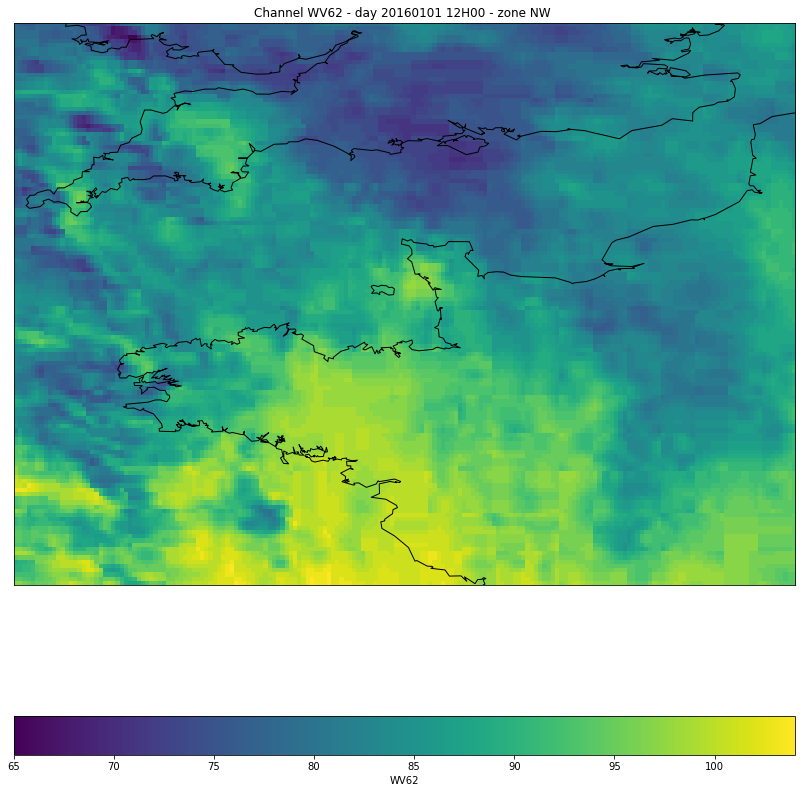

In [37]:
plot_figure(fpath,channel,title)

# Get information of the grid 


In [38]:
ds = get_satellite_as_xarray(fpath,zone,channel)

 We can look at coordinates present in xarray file. 
 We can see that *latitude* is **decreasing** and *longitude* is **increaseing** 

In [41]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 133, longitude: 185)
Coordinates:
  * latitude   (latitude) float64 51.9 51.85 51.81 51.77 ... 46.37 46.33 46.29
  * longitude  (longitude) float64 -5.842 -5.799 -5.757 ... 1.893 1.936 1.978
Data variables:
    WV62       (latitude, longitude) uint8 78 77 76 76 76 78 ... 95 94 94 94 94